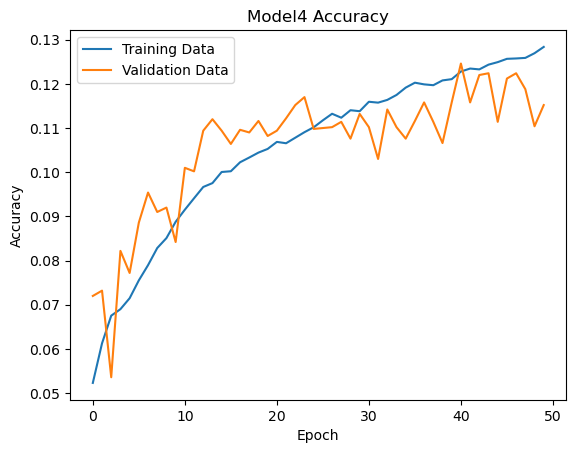

In [1]:
from matplotlib import pyplot as plt
import pickle
history = pickle.load(open("Model4/history.p", "rb"))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 Accuracy.png')

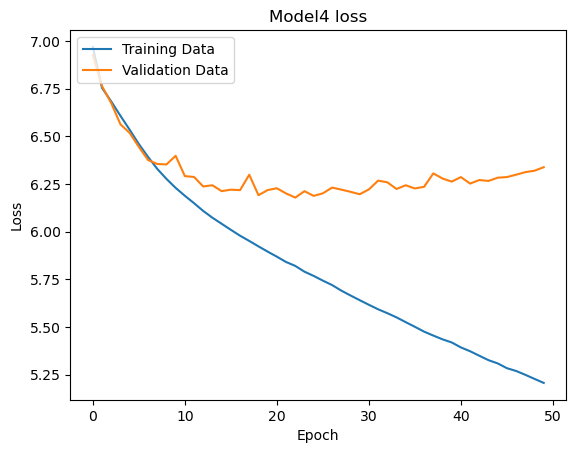

In [2]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 loss.png')

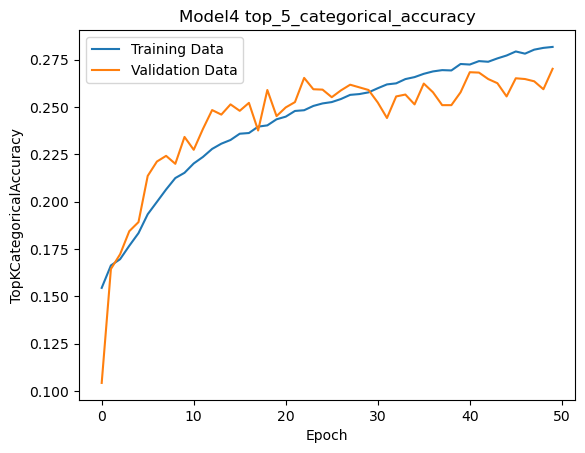

In [3]:
plt.plot(history['top_5_categorical_accuracy'])
plt.plot(history['val_top_5_categorical_accuracy'])
plt.title('Model4 top_5_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 top_5_categorical_accuracy k=5.png')

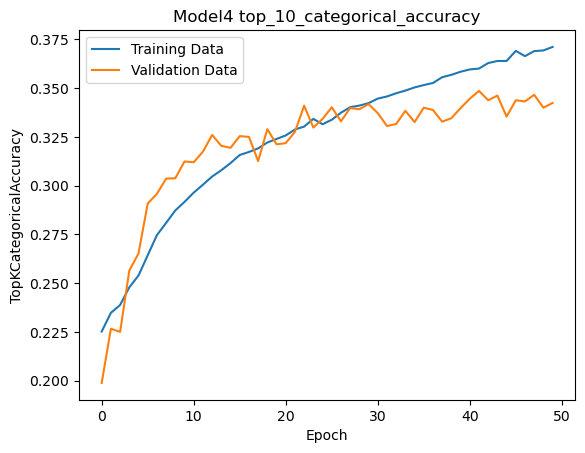

In [4]:
plt.plot(history['top_10_categorical_accuracy'])
plt.plot(history['val_top_10_categorical_accuracy'])
plt.title('Model4 top_10_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/Model4 top_10_categorical_accuracy k=5.png')

In [8]:
from tensorflow import keras
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import f1_score
import numpy as np

# Laden des Modells
def top_5_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)
def top_10_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=10)
# Registriere die benutzerdefinierten Metrikfunktionen
custom_objects = {'top_5_categorical_accuracy': top_5_categorical_accuracy,
                  'top_10_categorical_accuracy': top_10_categorical_accuracy}

# Lade das Modell mit den registrierten benutzerdefinierten Metriken
model = keras.models.load_model('Model4/Model_100000.h5', custom_objects=custom_objects)

# model = keras.models.load_model('Model4/Model_100000.h5')

# Vorbereiten der Validierungsdaten
with open('FormatedData/100000/x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)
with open('FormatedData/100000/y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

# Vorhersagen des Modells für die Validierungsdaten
predictions = model.predict(x_val)

# Genauigkeit (Accuracy)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1))
print("Accuracy:", accuracy)

# Perplexität (Perplexity)
perplexity = np.exp(np.mean(-np.log(predictions[np.arange(len(y_val)), np.argmax(y_val, axis=1)])))
print("Perplexity:", perplexity)

# Top-k Genauigkeit (Top-k Accuracy)
k = 5  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

# Top-k Genauigkeit (Top-k Accuracy)
k = 10  # Anzahl der wahrscheinlichsten Vorhersagen
top_k_accuracy = TopKCategoricalAccuracy(k=k)
top_k_accuracy.update_state(y_val, predictions)
print("Top-", k, "Accuracy:", top_k_accuracy.result().numpy())

157/157 [==============================] - 11s 68ms/step
Accuracy: 0.1152
Perplexity: 565.6149
Top- 5 Accuracy: 0.2702
Top- 10 Accuracy: 0.3424


In [ ]:
history